# Example 12-2: Neumann boundary conditions

In [Example 12-1](12-1_dirichlet_demo), we worked with Dirichlet boundary conditions where the function value was fixed at the ends.
Here we will work with **Neumann boundary conditions**, where the value of the first derivative (slope) is fixed at one of the ends.

## Summary of commands

No new commands are demonstrated in this exercise as it will closely mirror [Example 12-1](12-1_dirichlet_demo).

## Direct methods

We now rework the ODE in the previous example, but the boundary conditions are

The boundary conditions are

$$ y(x_L) = y_L = 1.43 \quad  \text{and} \quad y'(x_R) = y_R' = -2.6 $$

and the associated coefficients are:

$$ \begin{align}
a_j &= 1 + \frac{3h}{2} \\
a_N &= 2 \\
b_j &= 2h^2 - 2 \\
c_j &= 1 - \frac{3h}{2} \\
c_N &= 0 \tag{not used}
\end{align} $$

and

$$ \begin{align}
f_2 &= h^2 \cos(x_2) - \left(1 + \frac{3h}{2} \right) y_L \\
f_j &= h^2 \cos(x_j) \\
f_{N} &= h^2 \cos(x_{N}) - 2h \left( 1 - \frac{3h}{2} \right) y_R'
\end{align} $$

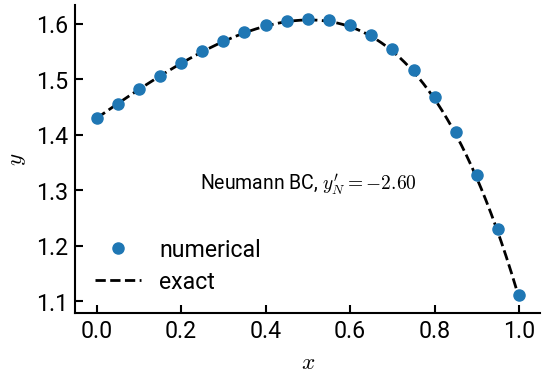

In [4]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# helper function to make tridiagonal matrices
def make_tridiag(a, b, c):
    """ For convenience, a, b, c should all be the same length.
        The function will automatically subset and place on the 
        corresponding diagonal. """
    return np.diag(a[1:], -1) + np.diag(b, 0) + np.diag(c[:-1], 1)

# constants
N = 21
yL = 1.43
ypR = -2.6
xL = 0
xR = 1
h = (xR - xL) / (N - 1)
x = np.linspace(xL, xR, N)

# construct matrix - carefully check dimensions and indices!!
a = np.ones(N - 1) * 1 + 3 * h / 2
a[-1] = 2
b = np.ones(N - 1) * 2 * h**2 - 2
c = np.ones(N - 1) * 1 - 3 * h / 2
A = make_tridiag(a, b, c)

# construct f and solve
f = np.cos(x[1:]) * h**2
f[0] -= (1 + 3 * h / 2) * yL
f[-1] -= 2 * h * (1 - 3 * h / 2) * ypR
y = np.linalg.solve(A, f)
y = np.concatenate([[yL], y])   # only need to add left BC this time

# exact solution
x1 = np.linspace(xL, xR, 10000)
y_exact = 1.8250 * np.exp(x1) - 0.4950 * np.exp(2 * x1) - 3/10 * np.sin(x1) + 1/10 * np.cos(x1)

# plot the result
fig, ax = plt.subplots()
ax.plot(x, y, 'o', label='numerical')
ax.plot(x1, y_exact, 'k--', lw=2, label='exact', zorder=-1)
ax.set(xlabel='$x$', ylabel='$y$')
ax.annotate("Neumann BC, $y_N' = -2.60$", (0.5, 1.3), ha='center', fontsize=14)
ax.legend()
plt.show()